In [1]:
import os
import pandas as pd
import matplotlib
from cell_population import CellPopulation
from expression_normalization import z_normalize_expression, strip_low_expression
from clustermap_generator import clusterRandomSubset, clusterAll
from differential_expression import find_noisy_genes

In [2]:
# store it as HDF
hdfPath = os.path.join(os.getcwd(), 'upr_sub_stripped_population.hdf')
pop = CellPopulation.from_hdf(hdfPath)

Loading matrix...
Loading metadata...
Done in 8.050777912139893s.
Done.


In [3]:
pop.cells

,guide_identity,guide_read_count,guide_UMI_count,guide_coverage,good_coverage,number_of_cells,guide_target,single_cell,UMI_count,gem_group
cell_barcode,,,,,,,,,,
AAACATACAAGATG-1,63(mod)_pBA580,282.0000,8.0000,35.2500,True,1.0000,63(mod),True,8866,1
AAACATACACCTAG-1,OST4_pDS353,331.0000,7.0000,47.2857,True,1.0000,OST4,True,13785,1
AAACATACTTCCCG-1,SEC61A1_pDS031,285.0000,10.0000,28.5000,True,1.0000,SEC61A1,True,7569,1
AAACATTGAAACAG-1,EIF2B4_pDS491,1036.0000,30.0000,34.5333,True,1.0000,EIF2B4,True,13834,1
AAACATTGCAGCTA-1,SRPR_pDS482,863.0000,25.0000,34.5200,True,1.0000,SRPR,True,15507,1
...,...,...,...,...,...,...,...,...,...,...
TTTGCATGCTTTAC-10,STT3A_pDS011,476.0000,17.0000,28.0000,True,1.0000,STT3A,True,14524,10
TTTGCATGGAGGAC-10,ARHGAP22_pDS458,539.0000,19.0000,28.3684,True,1.0000,ARHGAP22,True,11685,10
TTTGCATGTAGAGA-10,63(mod)_pBA580,647.0000,35.0000,18.4857,True,1.0000,63(mod),True,16610,10


In [4]:
pop.matrix

gene_id,ENSG00000243485,ENSG00000239945,ENSG00000237683,ENSG00000228463,ENSG00000237094,ENSG00000230021,ENSG00000235373,ENSG00000228327,ENSG00000237491,ENSG00000177757,...,ENSG00000215750,ENSG00000215689,ENSG00000212857,ENSG00000215781,ENSG00000218497,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215700,ENSG00000215699
cell_barcode,,,,,,,,,,,,,,,,,,,,,
AAACATACAAGATG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACATACACCTAG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
AAACATACTTCCCG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
AAACATTGAAACAG-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
AAACATTGCAGCTA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCATGCTTTAC-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
TTTGCATGGAGGAC-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGCATGTAGAGA-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [5]:
# combine cell samples by guide_target
mean_pop = pop.average('guide_target', verbose=True)

Computing average expression matrices...
Applying to key 63(mod)...
Applying to key AARS...
Applying to key AMIGO3...
Applying to key ARHGAP22...
Applying to key ASCC3...
Applying to key ATP5B...
Applying to key CAD...
Applying to key CARS...
Applying to key CCND3...
Applying to key CHERP...
Applying to key COPB1...
Applying to key COPZ1...
Applying to key DAD1...
Applying to key DARS...
Applying to key DDOST...
Applying to key DDRGK1...
Applying to key DERL2...
Applying to key DHDDS...
Applying to key DNAJC19...
Applying to key EIF2B2...
Applying to key EIF2B3...
Applying to key EIF2B4...
Applying to key EIF2S1...
Applying to key FARSB...
Applying to key FECH...
Applying to key GBF1...
Applying to key GMPPB...
Applying to key GNPNAT1...
Applying to key Gal4-4(mod)...
Applying to key HARS...
Applying to key HSD17B12...
Applying to key HSPA5...
Applying to key HSPA9...
Applying to key HYOU1...
Applying to key IARS2...
Applying to key IDH3A...
Applying to key IER3IP1...
Applying to key K

/home/mland/QCB455/Project/cell_population.py:720: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  mean_pop.genes = pd.concat([missing, mean_pop.genes])


In [6]:
mean_pop.matrix

gene_id,ENSG00000243485,ENSG00000239945,ENSG00000237683,ENSG00000228463,ENSG00000237094,ENSG00000230021,ENSG00000235373,ENSG00000228327,ENSG00000237491,ENSG00000177757,...,ENSG00000215750,ENSG00000215689,ENSG00000212857,ENSG00000215781,ENSG00000218497,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215700,ENSG00000215699
63(mod),0.0000,0.0002,0.0044,0.0007,0.0000,0.0002,0.0004,0.0061,0.0100,0.0000,...,0.2690,0.0076,0.0004,0.1541,0.0000,0.7493,0.0004,0.1417,0.0007,0.0144
AARS,0.0000,0.0000,0.0083,0.0000,0.0000,0.0000,0.0000,0.0056,0.0083,0.0000,...,0.0833,0.0111,0.0000,0.1667,0.0000,1.2194,0.0000,0.0694,0.0000,0.0111
AMIGO3,0.0000,0.0000,0.0032,0.0016,0.0000,0.0000,0.0000,0.0032,0.0146,0.0000,...,0.2679,0.0032,0.0000,0.1575,0.0000,0.7987,0.0000,0.1169,0.0016,0.0130
ARHGAP22,0.0000,0.0025,0.0000,0.0000,0.0000,0.0000,0.0000,0.0025,0.0148,0.0000,...,0.2266,0.0246,0.0025,0.1650,0.0000,0.8079,0.0025,0.1305,0.0000,0.0172
ASCC3,0.0000,0.0014,0.0041,0.0014,0.0000,0.0000,0.0000,0.0041,0.0108,0.0000,...,0.2277,0.0081,0.0000,0.1365,0.0000,0.6466,0.0000,0.1297,0.0000,0.0169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTI2,0.0000,0.0019,0.0057,0.0000,0.0000,0.0000,0.0000,0.0113,0.0057,0.0000,...,0.3170,0.0094,0.0000,0.1585,0.0000,0.9396,0.0000,0.1528,0.0000,0.0226
UFL1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0041,0.0124,0.0000,...,0.2407,0.0124,0.0021,0.2033,0.0000,0.7552,0.0000,0.1307,0.0021,0.0145
UFM1,0.0000,0.0017,0.0000,0.0000,0.0000,0.0000,0.0000,0.0068,0.0085,0.0000,...,0.2927,0.0051,0.0017,0.1523,0.0000,0.7868,0.0000,0.1455,0.0000,0.0186
XRN1,0.0000,0.0048,0.0129,0.0016,0.0000,0.0000,0.0000,0.0048,0.0113,0.0000,...,0.2448,0.0129,0.0016,0.1755,0.0000,0.8502,0.0016,0.1594,0.0000,0.0242


478 variable genes found (0 excluded)


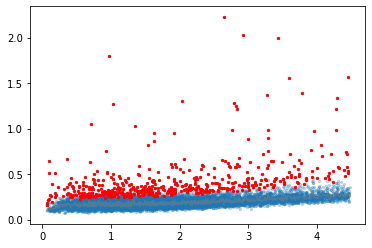

In [7]:
# find and subset differentially expressed genes
noisy_genes = find_noisy_genes(mean_pop)
mean_pop.matrix = z_normalize_expression(mean_pop, scale_by_total=True)
diff_expressed_matrix = mean_pop.where(genes=noisy_genes, gene_names=True)

In [8]:
diff_expressed_matrix

,HES4,ATAD3B,SMIM1,MRTO4,ID3,RHD,RHCE,CD52,AIM1L,RCC1,...,SLC19A1,AL133493.2,LSS,MT-ND1,MT-ND2,MT-CO1,MT-ATP6,MT-ND3,MT-ND4,MT-CYB
63(mod),0.1763,0.5764,0.0789,1.0860,-0.3661,0.2276,0.2484,-0.0299,-0.4103,1.0816,...,0.7802,0.1034,-0.4532,0.1431,0.5765,0.3368,0.6032,0.4816,0.6140,0.3747
AARS,0.0049,-1.2842,-0.9323,-1.6847,-0.1354,-1.1518,-1.5867,0.2306,1.3491,-1.7427,...,-2.3646,-1.2731,0.0237,-0.8213,-1.4815,-0.5504,-1.5023,-1.2431,-1.2256,-1.2558
AMIGO3,0.0765,0.1293,-0.0691,0.9236,-0.4743,0.0865,0.1581,-0.3427,-0.3466,0.7542,...,1.4705,0.4637,-0.1406,-0.1181,0.4071,0.0045,0.4512,0.6069,0.4051,0.3471
ARHGAP22,0.8490,-0.2657,0.4923,-0.5437,-1.3678,0.3665,-0.0524,0.3419,-0.2364,0.2818,...,-0.5050,-0.6740,2.3669,0.3357,0.3123,2.0166,1.7921,0.0631,1.6385,1.0032
ASCC3,0.1278,0.7887,-0.3556,1.0154,-0.2377,-0.1589,-0.3438,0.9082,-0.2703,1.9650,...,1.3552,-0.0325,-0.3090,-0.6259,0.6245,-0.2666,0.7499,0.8812,0.3123,-0.1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTI2,-0.2936,0.3754,0.2520,1.3135,-0.7175,1.2723,0.8803,0.2257,-0.4905,0.4741,...,1.1215,1.0076,-0.2471,0.3155,0.8437,0.7725,0.8064,0.9753,0.8501,0.4329
UFL1,-0.1940,1.0211,-0.3620,0.9479,-0.0160,0.2422,0.2240,0.0293,-0.3764,0.8625,...,0.7016,0.3168,-0.5304,-0.0655,0.1923,-0.4348,-0.0317,-0.0087,-0.1518,-0.1146
UFM1,-0.1559,0.8857,-0.0554,0.5598,-0.0410,0.3812,0.0058,-0.1620,-0.4083,0.3592,...,1.0797,0.6428,-0.3361,-0.0755,0.3679,-0.2002,0.1732,0.3594,0.1714,0.0567
XRN1,0.9767,6.9138,-0.0879,1.2579,-0.4462,-0.1349,0.0279,0.0870,0.1359,1.2135,...,1.5723,-0.1794,1.2550,-0.3300,0.1506,-0.3334,0.0689,-0.1782,-0.0627,-0.1685


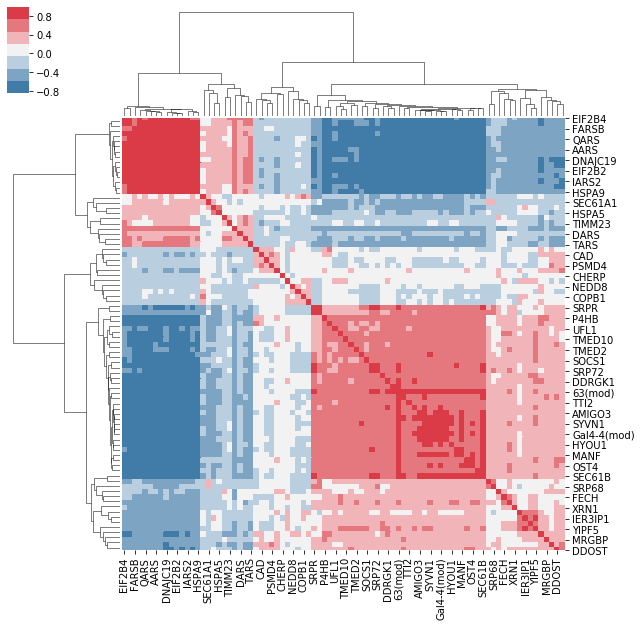

In [9]:
# Perform cluster analysis
clusterAll(diff_expressed_matrix, method='pearson')

/usr/licensed/anaconda3/2019.10/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


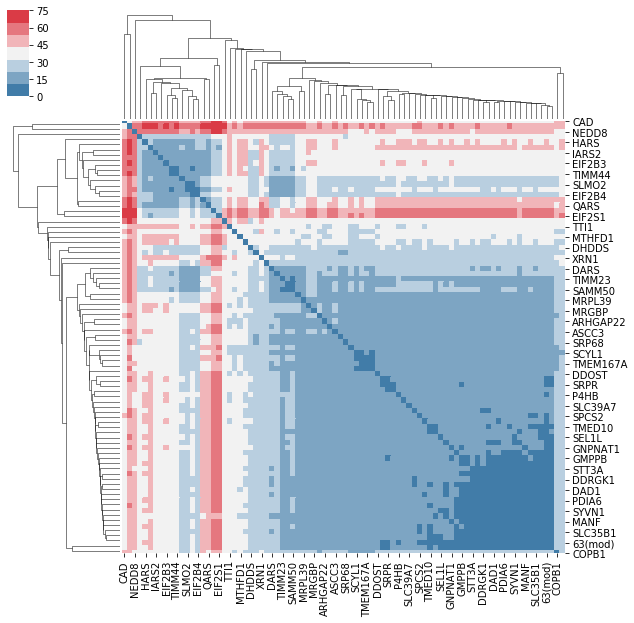

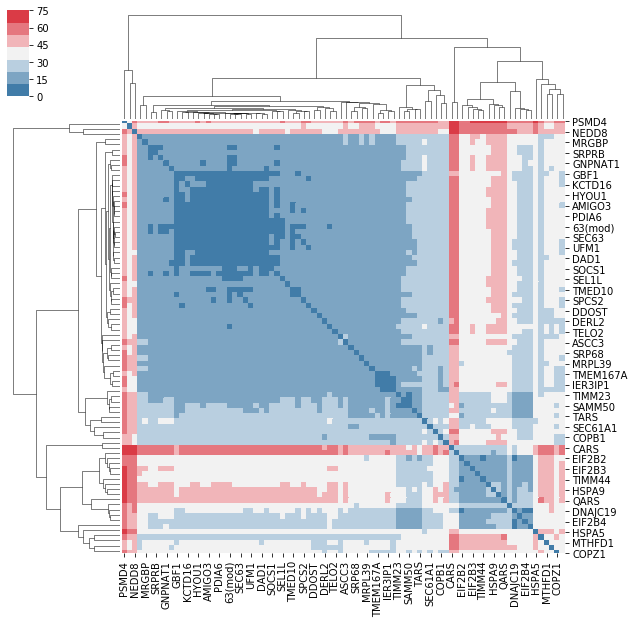

In [10]:
clusterAll(diff_expressed_matrix, method='euclidean')